In [14]:
import pandas as pd
from find_shortest_path import get_path
from build_data import build_data
from numpy import mean
from tqdm import tqdm
import random
import seaborn as sns
from matplotlib import pyplot as plt

# Random seed
random.seed(42)
# Seaborn theme
sns.set_theme(style="whitegrid")

In [69]:
stations_lst = pd.read_csv('./london/underground_stations.csv')['name'].unique()
# Make a combination set of stations
combinations = []
for i in range(len(stations_lst)):
    for j in range(i+1, len(stations_lst)):
        combinations.append((stations_lst[i], stations_lst[j]))
print("length of combination list:", len(combinations))

# Randomly 1000 pairs of stations
combinations = list(combinations)
random.shuffle(combinations)
combinations = combinations[:1000]

# Get the map
stations, underground_lines = build_data()

length of combination list: 46665


In [70]:
def random_test(algorithm, heuristic):
    distance_lst = []
    closize_lst = []

    for combination in tqdm(combinations):
        path, distance, closize = get_path(combination[0], combination[1], stations, algorithm, heuristic)
        if path is None:
            print("No path found")
        else:
            distance_lst.append(distance)
            closize_lst.append(closize)
    return distance_lst, closize_lst

In [71]:
# algorithm=(astar greedy_bfs dijikstra)
# heuristic=(manhattan euclidean diagonal)
dis_lst = {}
closize_lst = {}

In [72]:
dis_lst["dijikstra"], closize_lst["dijikstra"] = random_test("dijikstra", None)
dis_lst["greedy_bfs"], closize_lst["greedy_bfs"] = random_test("greedy_bfs", "manhattan")
dis_lst["astar_manhattan"], closize_lst["astar_manhattan"] = random_test("astar", "manhattan")
dis_lst["astar_euclidean"], closize_lst["astar_euclidean"] = random_test("astar", "euclidean")
dis_lst["astar_diagonal"], closize_lst["astar_diagonal"] = random_test("astar", "diagonal")

100%|██████████| 1000/1000 [00:17<00:00, 57.72it/s]


In [75]:
# Save the data
dis_df = pd.DataFrame(dis_lst)
closize_df = pd.DataFrame(closize_lst)
dis_df.to_csv("./out/dis_df.csv", index=False)
closize_df.to_csv("./out/closize_df.csv", index=False)

In [15]:
closize_df = pd.read_csv("./out/closize_df.csv")
dis_df = pd.read_csv("./out/dis_df.csv")

In [16]:
closize_df.describe()

,dijikstra,greedy_bfs,astar_manhattan,astar_euclidean,astar_diagonal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,176.452000,41.882000,41.864000,43.684000,42.228000
std,88.672027,25.850616,22.815083,24.086642,22.827376
min,3.000000,3.000000,3.000000,3.000000,3.000000
25%,101.750000,24.000000,25.000000,25.000000,25.000000
50%,186.500000,37.000000,38.000000,40.000000,40.000000
75%,255.000000,53.000000,55.000000,57.250000,54.000000
max,306.000000,158.000000,119.000000,126.000000,123.000000


In [17]:
dis_df.describe()

,dijikstra,greedy_bfs,astar_manhattan,astar_euclidean,astar_diagonal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,18.840952,21.026912,19.296651,19.111700,19.158565
std,11.049283,13.177806,11.424384,11.210963,11.286405
min,0.753848,0.753848,0.753848,0.753848,0.753848
25%,10.412610,11.158555,10.554678,10.546185,10.505481
50%,16.995444,18.369361,17.340259,17.274684,17.224347
75%,25.375166,27.978806,25.838977,25.719113,25.838977
max,64.778591,78.907162,64.792549,64.792549,64.792549


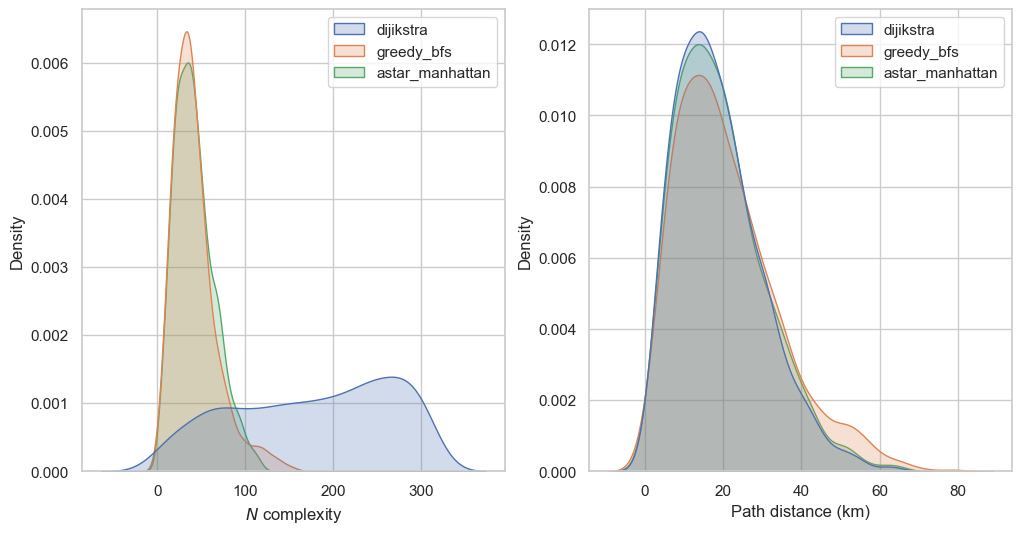

In [18]:
# Distribution plot of closize and distance
df_closize_algs = pd.DataFrame(
    {'dijikstra': closize_df["dijikstra"],
     'greedy_bfs': closize_df["greedy_bfs"],
     'astar_manhattan': closize_df["astar_manhattan"],
    })
df_distance_algs = pd.DataFrame(
    {'dijikstra': dis_df["dijikstra"],
     'greedy_bfs': dis_df["greedy_bfs"],
     'astar_manhattan': dis_df["astar_manhattan"],
    })
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.kdeplot(data=df_closize_algs, fill=True, ax=axes[0])
axes[0].set_xlabel(r"$N$ complexity")
sns.kdeplot(data=df_distance_algs, fill=True, ax=axes[1])
axes[1].set_xlabel("Path distance (km)")
fig.savefig("./fig/algs_kde.pdf")

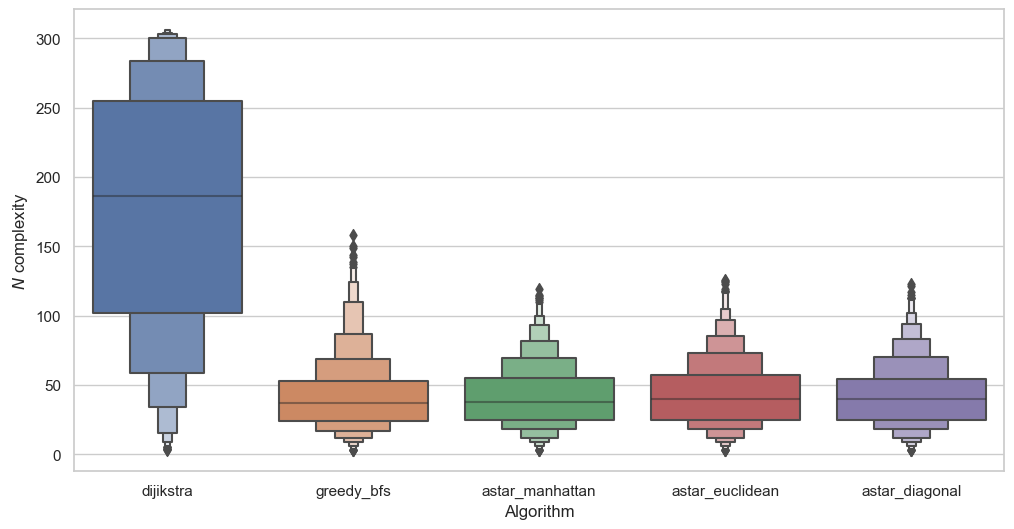

In [19]:
# Box plot of closize
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=closize_df[["dijikstra", "greedy_bfs", "astar_manhattan", "astar_euclidean", "astar_diagonal"]], ax=ax)
ax.set_xlabel("Algorithm")
ax.set_ylabel(r"$N$ complexity")
fig.savefig("./fig/closize_box.pdf")

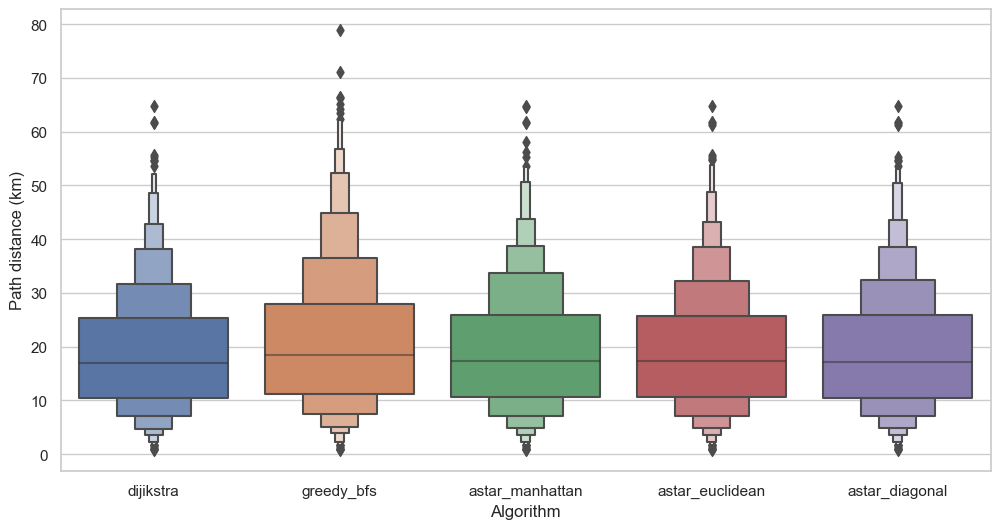

In [40]:
# Path distance
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxenplot(data=dis_df[["dijikstra", "greedy_bfs", "astar_manhattan", "astar_euclidean", "astar_diagonal"]], ax=ax)
ax.set_xlabel("Algorithm")
ax.set_ylabel("Path distance (km)")
fig.savefig("./fig/dis_box.pdf")

In [46]:
# Table of astar
astar_df = closize_df[["astar_manhattan", "astar_euclidean", "astar_diagonal"]]
astar_df.describe()

,astar_manhattan,astar_euclidean,astar_diagonal
count,1000.000000,1000.000000,1000.000000
mean,41.864000,43.684000,42.228000
std,22.815083,24.086642,22.827376
min,3.000000,3.000000,3.000000
25%,25.000000,25.000000,25.000000
50%,38.000000,40.000000,40.000000
75%,55.000000,57.250000,54.000000
max,119.000000,126.000000,123.000000


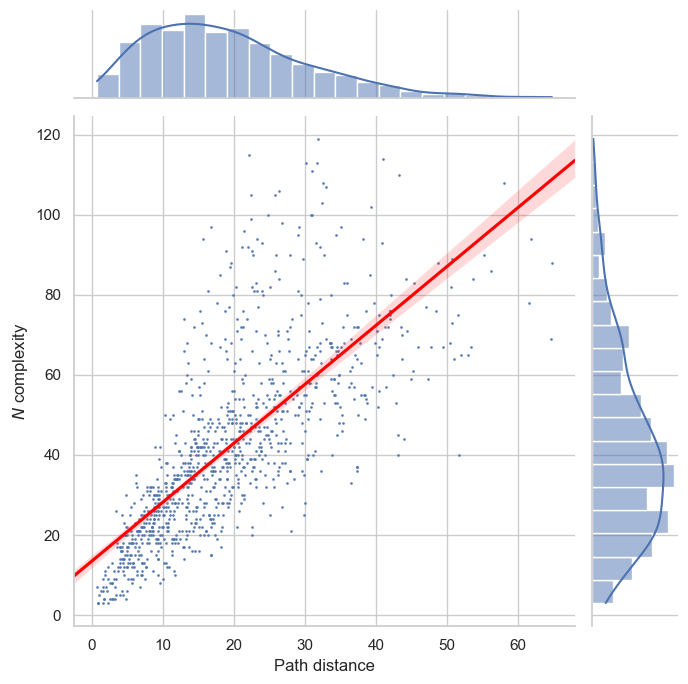

In [20]:
# Relationship between closize and distance of atar
reg_df = pd.DataFrame(
    {r'$N$ complexity': closize_df["astar_manhattan"],
     'Path distance': dis_df["astar_manhattan"],
    })
sns.jointplot(data=reg_df, x="Path distance", y=r"$N$ complexity", kind="reg", truncate=False, 
              color="b", height=7, scatter_kws={"s": 1}, line_kws={"color": "red"})
plt.savefig("./fig/reg.pdf")